In [1]:
### importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## importing dataset
data = pd.read_csv(r'Advertising.csv',index_col = 0,header = 0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
print(data.dtypes)

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object


In [4]:
print(data.shape)

(200, 4)


In [5]:
print(data.describe())

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [6]:
## checking missing values
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

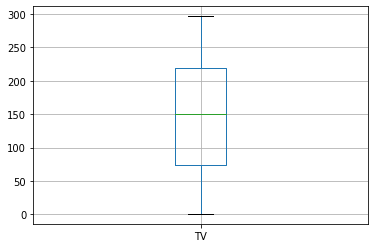

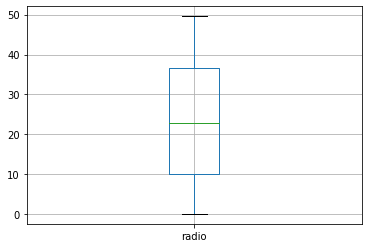

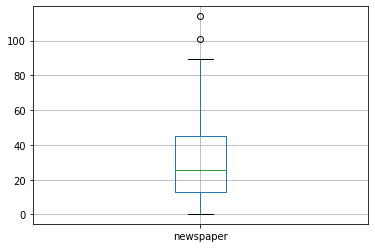

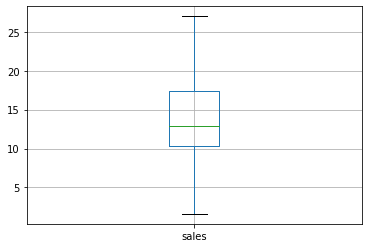

In [7]:
#Assumption 1: There should be no outliers in the data. Check using boxplot.
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

<Figure size 2160x1080 with 0 Axes>

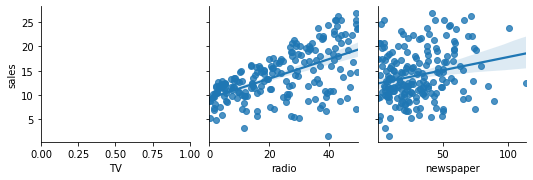

In [8]:
#Assumption 2:Assumption of Linearity:Every ind var should have a linear relationship with the dep var.
plt.figure(figsize=(30,15))
sns.pairplot(data,x_vars=data.columns[0:-1],y_vars="sales",
                kind='reg')
plt.show()

In [9]:
## create X and Y
X=data[['TV','radio','newspaper']] ## independent variables
Y=data['sales']                    # dependent variable
# X=data.iloc[:,0:-1]

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

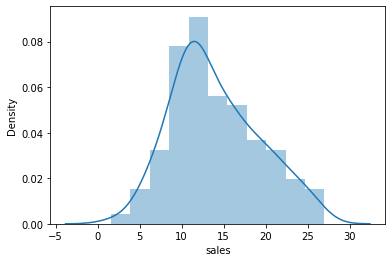

In [10]:
#Assumption of Normality: The dependent variable should follow an approximate normal distribtion
sns.distplot(Y,hist=True)

In [11]:
"""
we use log transformation i  case of high skewness, we use log_transform for normal ditribution
# Log transformation
import numpy as np
Y_log = np.log(Y)
"""

'\nwe use log transformation i  case of high skewness we use log_transform for normal ditribution\n# Log transformation\nimport numpy as np\nY_log = np.log(Y)\n'

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>, <AxesSubplot:>]],
      dtype=object)

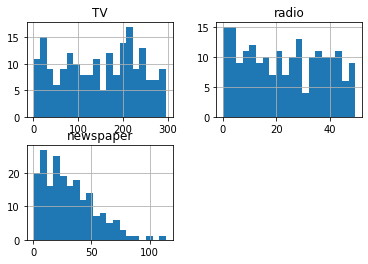

In [12]:
X.hist(bins=20)

In [13]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)
import numpy as np

# apply log + 1 transformation for all numeric features with skewness over .75
#bcoz  if there is zero available in numeric then log(0) => -infinity which is error
#thats why we use log + 1 transformation

# prerequisite for applying log transformation is by checking min value of numeric data if it is zero use log +1

X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index]) # .index is used for traversing through each variable

#here original var will get replaced by skewness value and highly skewed variable (newspaper) will get replaced by log_transformation

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [14]:
data_num_skewed.index

Index(['newspaper'], dtype='object')

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


<AxesSubplot:>

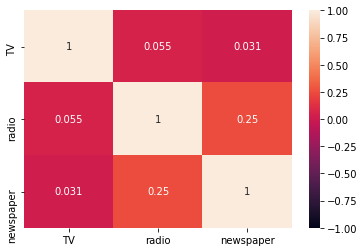

In [15]:
#Assumption of no multicollinearity: There should be no multicolliearity between the independent variables
# eliminate the var which is correlated with many var
corr_df=X.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [17]:
X.shape[1]

3

In [18]:
#X.drop("newspaper",axis=1,inplace=True)
#rerun the VIF code

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10) ## default test_size=0.25

In [20]:
##obs >1000 : test_size=0.3
## obs <1000: test_size=0.2

In [21]:
X_train

,TV,radio,newspaper
191,39.5,41.1,1.916923
8,120.2,19.6,2.533697
27,142.9,29.3,2.610070
139,43.0,25.9,3.068053
59,210.8,49.6,3.655840
...,...,...,...
114,209.6,20.6,2.459589
65,131.1,42.8,3.397858
16,195.4,47.7,3.987130
126,87.2,11.8,3.292126


In [22]:
Y_train

191    10.8
8      13.2
27     15.0
139     9.6
59     23.8
       ... 
114    15.9
65     18.0
16     22.4
126    10.6
10     10.6
Name: sales, Length: 160, dtype: float64

In [23]:
X_test.shape

(40, 3)

In [24]:
Y_test.shape

(40,)

In [25]:
from sklearn.linear_model import LinearRegression
# crete a model obj
lm = LinearRegression()
# train the model obj
lm.fit(X_train,Y_train)

# print intercepts and coef
print(lm.intercept_)
print(lm.coef_)

3.353291385815151
[ 0.0437425   0.19303708 -0.04895137]


In [26]:
## pair the feature names with the coeff
print(list(zip(X.columns,lm.coef_)))

[('TV', 0.04374250157742165), ('radio', 0.193037078973453), ('newspaper', -0.048951368222487926)]


In [27]:
## internal working of predict function

X1=10   ## for tv less investmnt
X2=290  # for radio more invest
X3=np.log1p(0) ## no invest for news paper
Y_pred=3.3532913858151474+(0.0437425 *X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)



59.77146958581515


In [28]:
## predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [29]:
lm.score(X_train, Y_train)
#predict on the obs present in X_train, generate Y_pred and then compare with Y_train,
#on the basis of which it will return the R2.

0.9208986647500219

In [30]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,TV,radio,newspaper,Actual sales,Predicted sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


In [31]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.834801071903532
2.59297691109306
0.8322725168816474


In [32]:
print(Y_test.min()) ## rmse we got above is 2.59 close to min value i,e good rmse

1.6


In [33]:
print(Y_test.max())

25.5


In [34]:
new_df["Deviation"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TV,radio,newspaper,Actual sales,Predicted sales,Deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490


In [35]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
random_state=10)

In [36]:
from sklearn.linear_model import Ridge
lm=Ridge()
lm.fit(X_train,Y_train)

print(lm.intercept_)
print(lm.coef_)

3.3522471725966003
[ 0.04374234  0.19302603 -0.04853131]


In [37]:
Y_pred=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)


"""
Previous values:
0.834801071903532
2.59297691109306
0.8322725168816474
"""

0.8348082644975934
2.592920462683998
0.832279819566434


'\nPrevious values:\n0.834801071903532\n2.59297691109306\n0.8322725168816474\n'

In [38]:
from sklearn.linear_model import Lasso
lm=Lasso()
lm.fit(X_train,Y_train)

print(lm.intercept_)
print(lm.coef_)

3.3367940582203186
[ 0.04362374  0.18766033 -0.        ]


In [39]:
Y_pred=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

"""
Previous values:
0.834801071903532
2.59297691109306
0.8322725168816474
"""

0.8360506658527163
2.5831514271094234
0.8335412372688292


'\nPrevious values:\n0.834801071903532\n2.59297691109306\n0.8322725168816474\n'

In [40]:
new_df=pd.DataFrame()
new_df=X_train

new_df["sales"]=Y_train
new_df.shape

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(160, 4)

In [41]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper', data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

"""
3.3532913858151527
[ 0.0437425 0.19303708 -0.04895137]

"""

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           1.10e-85
Time:                        15:18:52   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

'\n3.3532913858151527\n[ 0.0437425 0.19303708 -0.04895137]\n\n'

In [43]:
y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)


0.8360506658527163
2.5831514271094234
0.8335412372688292


In [44]:
lm_model = sm.ols(formula='sales ~ TV + radio', data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Wed, 04 Nov 2020   Prob (F-statistic):           3.47e-87
Time:                        15:23:43   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [45]:
y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8360506658527163
2.5831514271094234
0.8335412372688292


C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Residuals')

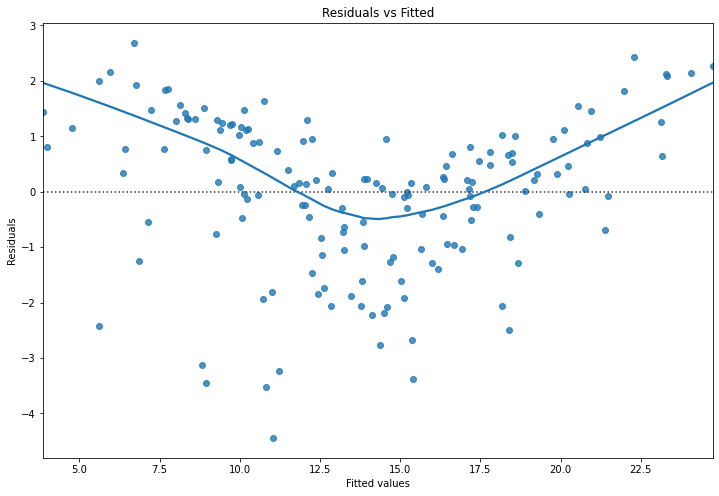

In [46]:
## diagnostic plot
## assumption : error should be random
import matplotlib.pyplot as plt
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'sales', data=new_df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')
## should not have repetitve wave like pattern

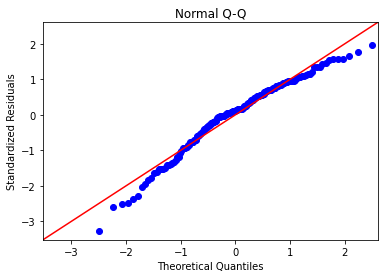

In [47]:
#Errors should follow an approximate normal distribution
# data points should follow red diagonal line
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

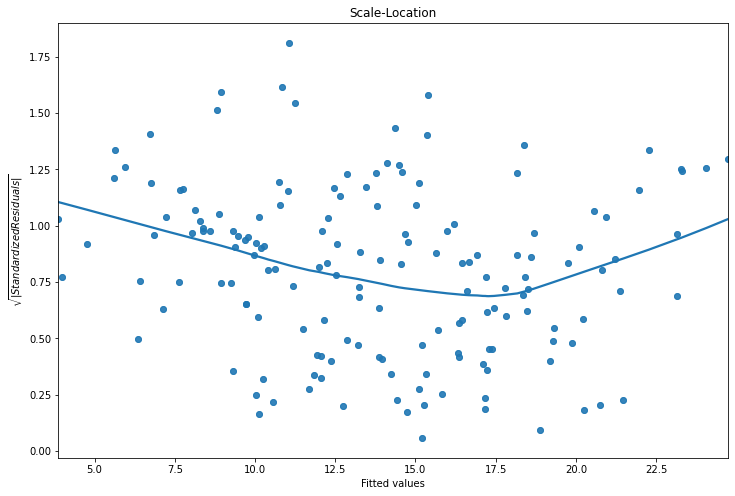

In [48]:
## scale location plot
#Errors should follow a constant variance (Homoskedasticity)
# normalized residuals
## approximate horizantal line
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')